## 1000 Movie Data Analysis


1. [Introduction to Dataset and Research Question](#section1)<br/>
   
2. [Data Wrangling](#section2)<br/>

3. [Exploratory Data Analysis](#section3)<br/>

4. [Conclusion](#section4)<br/>
     


<a id=section1></a>

# Introduction

In this project I will analyse Movies data set containing information about 1000 movies published between 2006 and 2016.

Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. Revenue?
3. Which genres have high avg. Vote?
4. Which genres have high avg. Rating?
6. Which genres have high avg. Metascore?
7. Which genres have high number of movies released?
8. How many movies are released per year ?
9. Analysis of development of means of variables per genre over the years
10. The distribution of revenue in different Rating levels in recent five years.

Find the Properties are Associated with Successful Movies
11. What kinds of properties are associated with movies that have high Revenue?
12. What kinds of properties are associated with movies that have high voting?

Research Hypotheses (H):
1. The best movies according to vote avg. return high revenue.
2. The best movies according to Ratings return high revenue.
3. High metascore movies have a high vote avg.
4. High rating movies have a high popularity.


<a id=section2></a>

# Data Wrangling

1. Installing packages for importing required libraries
2. Load data 
3. Get General info 
4. Overview Identify problems and actions to analyse research questions

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
sns.set()

Loading the data from CSV File

In [3]:
moviedata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")
moviedata.tail(5)

Rank                   Title                  Genre  \
995   996    Secret in Their Eyes    Crime,Drama,Mystery   
996   997         Hostel: Part II                 Horror   
997   998  Step Up 2: The Streets    Drama,Music,Romance   
998   999            Search Party       Adventure,Comedy   
999  1000              Nine Lives  Comedy,Family,Fantasy   

                                           Description          Director  \
995  A tight-knit team of rising investigators, alo...         Billy Ray   
996  Three American college students studying abroa...          Eli Roth   
997  Romantic sparks occur between two dance studen...        Jon M. Chu   
998  A pair of friends embark on a mission to reuni...    Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...  Barry Sonnenfeld   

                                                Actors  Year  \
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
995                111     6.2  27585                 NaN       45.0  
996                 94     5.5  73152               17.54       46.0  
997                 98     6.2  70699               58.01       50.0  
998                 93     5.6   4881                 NaN       22.0  
999                 87     5.3  12435               19.64       11.0

In [4]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [5]:
moviedata.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
moviedata.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

In [7]:
profile = pp.ProfileReport(moviedata)
profile

From all above observations, we came to know that there are missing values in Revenue and Metascores. Let them replace with mean values as total number of missing values are less and later generate the report again.

In [8]:
moviedata.median()

Rank                     500.500
Year                    2014.000
Runtime (Minutes)        111.000
Rating                     6.800
Votes                 110799.000
Revenue (Millions)        47.985
Metascore                 59.500
dtype: float64

In [9]:
# Changing the Columns names for better handling and generating the list
md = moviedata.rename(columns={'Rank':'Rank', 'Title':'Title', 'Genre':'Genre', 'Description':'Description', 'Director':'Director', 'Actors':'Actors', 'Year':'Year', 'Metascore':'Metascore', 'Rating':'Rating', 'Revenue (Millions)': 'Revenue', 'Runtime (Minutes)': 'Runtime'})
list(md)

['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime',
 'Rating',
 'Votes',
 'Revenue',
 'Metascore']

In [10]:
# replacing missing revenue files with median
median_rev = md.Revenue.median()
md.Revenue.fillna(median_rev, inplace = True)
# replacing missing metascore entries with median
median_meta = md.Metascore.median()
md.Metascore.fillna(median_meta, inplace = True)

In [11]:
md.tail(5)

Rank                   Title                  Genre  \
995   996    Secret in Their Eyes    Crime,Drama,Mystery   
996   997         Hostel: Part II                 Horror   
997   998  Step Up 2: The Streets    Drama,Music,Romance   
998   999            Search Party       Adventure,Comedy   
999  1000              Nine Lives  Comedy,Family,Fantasy   

                                           Description          Director  \
995  A tight-knit team of rising investigators, alo...         Billy Ray   
996  Three American college students studying abroa...          Eli Roth   
997  Romantic sparks occur between two dance studen...        Jon M. Chu   
998  A pair of friends embark on a mission to reuni...    Scot Armstrong   
999  A stuffy businessman finds himself trapped ins...  Barry Sonnenfeld   

                                                Actors  Year  Runtime  Rating  \
995  Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...  2015      111     6.2   
996  Lauren German, Heather Matarazzo, Bijou Philli...  2007       94     5.5   
997  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008       98     6.2   
998  Adam Pally, T.J. Miller, Thomas Middleditch,Sh...  2014       93     5.6   
999  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016       87     5.3   

     Votes  Revenue  Metascore  
995  27585   47.985       45.0  
996  73152   17.540       46.0  
997  70699   58.010       50.0  
998   4881   47.985       22.0  
999  12435   19.640       11.0

In [12]:
# Checking for null values after operations
md.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

<b> Splitting Genres for further operations and getting answers for questions </b>

In [13]:
s = md['Genre'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genre'
del md['Genre']
md_split_genres = md.join(s)

In [14]:
md_split_genres.head(5)

Rank                    Title  \
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
1     2               Prometheus   
1     2               Prometheus   

                                         Description      Director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
0  A group of intergalactic criminals are forced ...    James Gunn   
0  A group of intergalactic criminals are forced ...    James Gunn   
1  Following clues to the origin of mankind, a te...  Ridley Scott   
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              Actors  Year  Runtime  Rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   

    Votes  Revenue  Metascore      Genre  
0  757074   333.13       76.0     Action  
0  757074   333.13       76.0  Adventure  
0  757074   333.13       76.0     Sci-Fi  
1  485820   126.46       65.0  Adventure  
1  485820   126.46       65.0    Mystery

In [15]:
md_split_genres.shape

(2555, 12)

<a id=section3></a>

# Exploratory Data Analysis

<b> Explore Data Distribution of variables Descriptive statistics Research Questions: Genre analysis (Q1 - Q7) <br />
<b> Research Hypotheses: Correlation analysis (H1 - H5) </b>

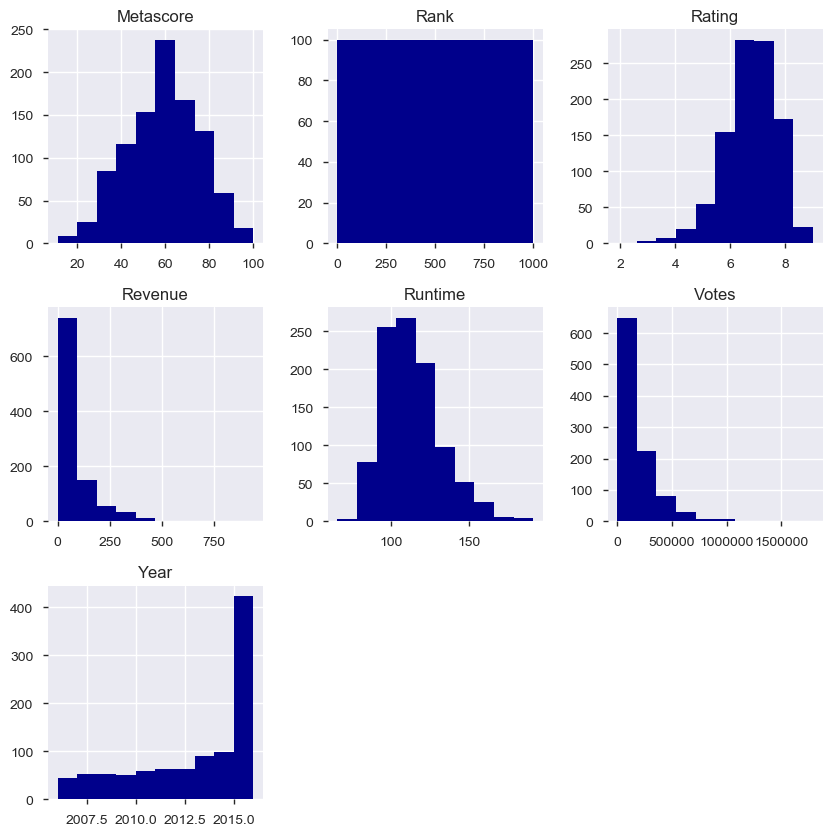

In [16]:
# Checking histograms to get idea of how variables are distrubuted (overall)
md.hist(color='DarkBlue',figsize= (10,10));

All variables are skewed. The only variable that is closed to a normal distribution is Metascore avg. (slightly right skewed). Rating is rightly skewed.

In [17]:
# Group data by genre and get mean for each genre and each variable, divide by 1 million for clarity and better visibility
md_genre_mean = md_split_genres.groupby(['Genre']).mean()
md_genre_mean ['revenue_million'] = md_genre_mean['Revenue']/1000000
del md_genre_mean['Revenue']

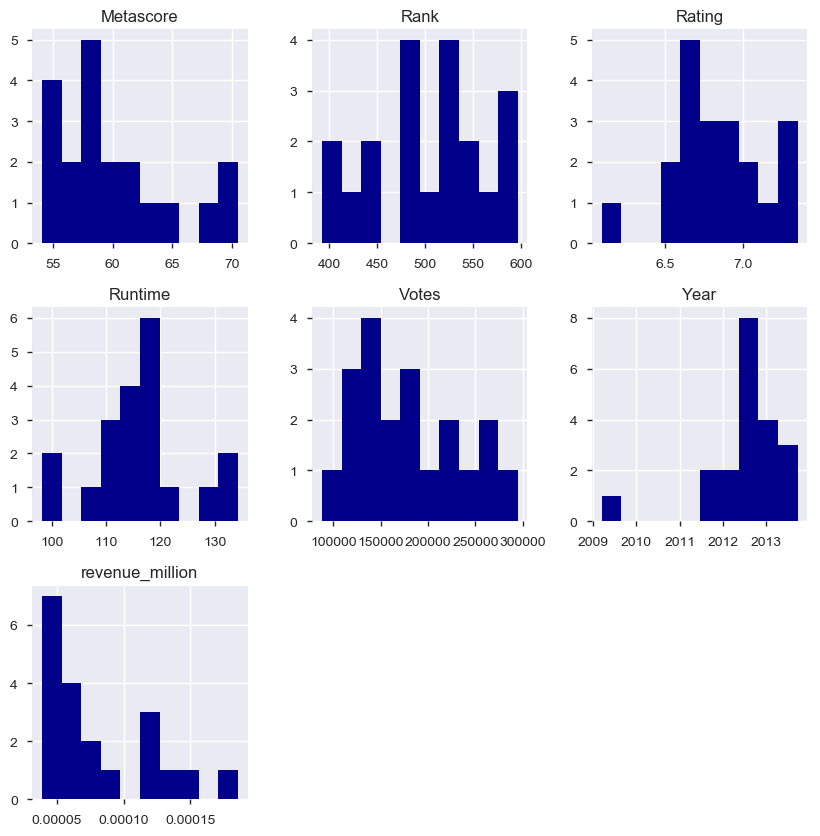

In [18]:
md_genre_mean.hist(color='DarkBlue',figsize= (10,10));

All means of variables per genre are skewed. Mean of runtime & rating across genres is closest to being normally distributed.

In [19]:
md.describe()

Rank         Year      Runtime       Rating         Votes  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000   113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962    18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000    66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000   100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000   111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000   123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000   191.000000     9.000000  1.791916e+06   

           Revenue    Metascore  
count  1000.000000  1000.000000  
mean     78.480040    59.018000  
std      97.118097    16.635336  
min       0.000000    11.000000  
25%      17.442500    47.750000  
50%      47.985000    59.500000  
75%      99.177500    71.000000  
max     936.630000   100.000000

In [20]:
md.nlargest(3, 'Revenue')

Rank                                       Title  \
50    51  Star Wars: Episode VII - The Force Awakens   
87    88                                      Avatar   
85    86                              Jurassic World   

                                          Description         Director  \
50  Three decades after the defeat of the Galactic...      J.J. Abrams   
87  A paraplegic marine dispatched to the moon Pan...    James Cameron   
85  A new theme park, built on the original site o...  Colin Trevorrow   

                                               Actors  Year  Runtime  Rating  \
50  Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  2015      136     8.1   
87  Sam Worthington, Zoe Saldana, Sigourney Weaver...  2009      162     7.8   
85  Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...  2015      124     7.0   

     Votes  Revenue  Metascore  
50  661608   936.63       81.0  
87  935408   760.51       83.0  
85  455169   652.18       59.0

In [21]:
md.nlargest(3, 'Rating')

Rank            Title                                        Description  \
54     55  The Dark Knight  When the menace known as the Joker wreaks havo...   
80     81        Inception  A thief, who steals corporate secrets through ...   
117   118           Dangal  Former wrestler Mahavir Singh Phogat and his t...   

              Director                                             Actors  \
54   Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...   
80   Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...   
117      Nitesh Tiwari  Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...   

     Year  Runtime  Rating    Votes  Revenue  Metascore  
54   2008      152     9.0  1791916   533.32       82.0  
80   2010      148     8.8  1583625   292.57       74.0  
117  2016      161     8.8    48969    11.15       59.5

In [22]:
md.nlargest(3, 'Runtime')

Rank                    Title  \
828   829               Grindhouse   
88     89        The Hateful Eight   
82     83  The Wolf of Wall Street   

                                           Description           Director  \
828  Quentin Tarantino and Robert Rodriguez's homag...   Robert Rodriguez   
88   In the dead of a Wyoming winter, a bounty hunt...  Quentin Tarantino   
82   Based on the true story of Jordan Belfort, fro...    Martin Scorsese   

                                                Actors  Year  Runtime  Rating  \
828  Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell  2007      191     7.6   
88   Samuel L. Jackson, Kurt Russell, Jennifer Jaso...  2015      187     7.8   
82   Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...  2013      180     8.2   

      Votes  Revenue  Metascore  
828  160350    25.03       59.5  
88   341170    54.12       68.0  
82   865134   116.87       75.0

In [23]:
# getting dataframe ready for plotting genre movies across years
md_year = pd.DataFrame(md_split_genres.groupby('Year').Title.nunique())
md_year

Title
Year       
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297

In [24]:
md_year.nlargest(5,'Title')

Title
Year       
2016    297
2015    127
2014     98
2013     91
2012     64

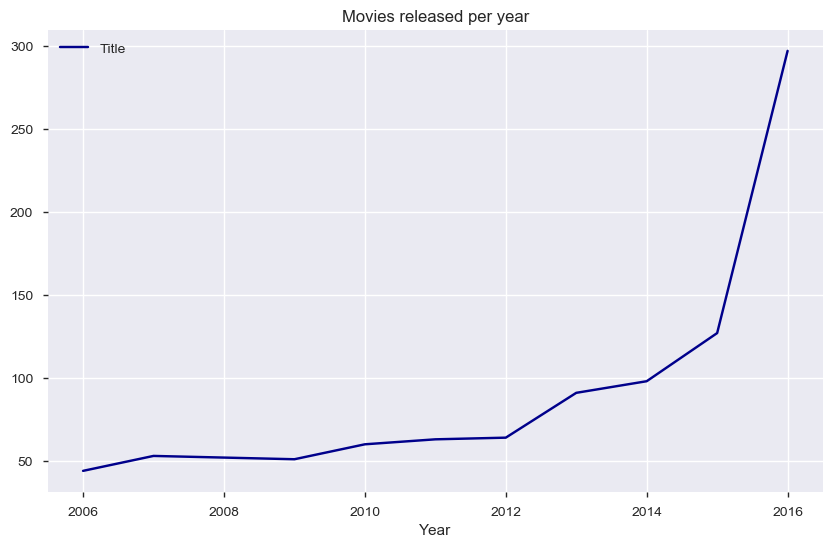

In [25]:
# Plot data, line chart for showing development over the years
md_year.plot.line(title = 'Movies released per year',color='DarkBlue',figsize=(10, 6));

In this graph we see that over time more and more movies were made per year. Starting at just 44 movies in 2006 up to 297 in 2016 with a max value. Trend from 2014 to 2016 is increasing tremendously.

In [26]:
# Get mean of variables grouped by year (new data frame) in order to see what changed
md_year_mean = md_split_genres.groupby('Year').mean()

In [27]:
md_year_mean.head(5)

Rank     Runtime    Rating          Votes     Revenue  Metascore
Year                                                                        
2006  577.371901  120.991736  7.111570  270593.446281   85.559421  64.144628
2007  582.741007  122.683453  7.180576  248276.115108   86.626583  64.428058
2008  627.164179  112.097015  6.814925  279564.641791  102.795634  57.339552
2009  579.507463  117.686567  7.026866  267873.940299  113.070560  58.223881
2010  593.591463  111.304878  6.798171  251086.780488  105.124543  59.155488

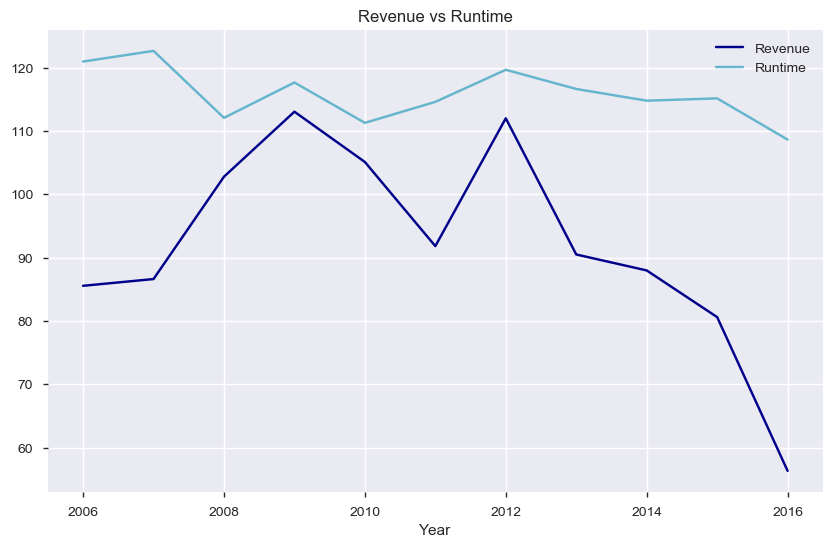

In [28]:
md_year_mean[['Revenue','Runtime']].plot(title = 'Revenue vs Runtime',color=('DarkBlue','c','crimson'),linestyle=('-'),figsize=(10, 6));

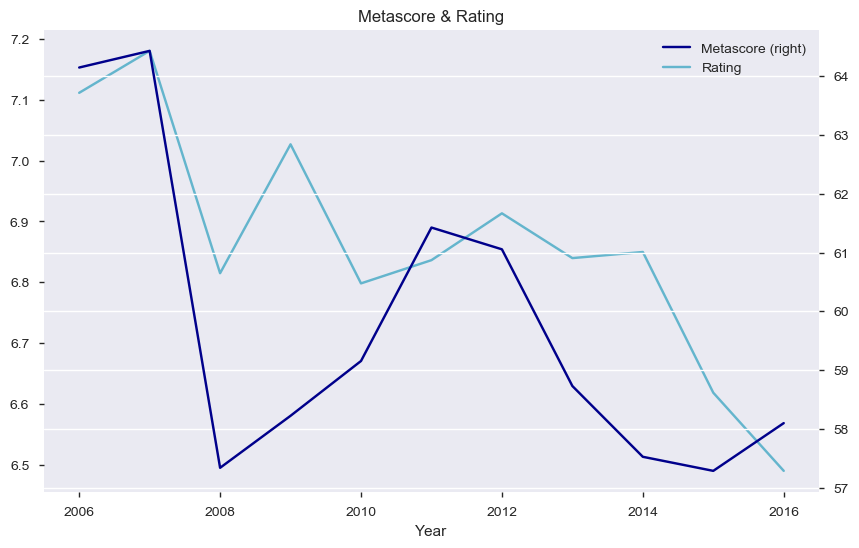

In [29]:
md_year_mean[['Metascore', 'Rating']].plot(title = 'Metascore & Rating',color=('DarkBlue','c'),figsize=(10, 6),secondary_y=['Metascore']);

From above graph we can conclude that Ratings and Metascore are continously falling. In 2008 there is much drop observed in Metascore.

In [30]:
md_split_genres.head(5)

Rank                    Title  \
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
1     2               Prometheus   
1     2               Prometheus   

                                         Description      Director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
0  A group of intergalactic criminals are forced ...    James Gunn   
0  A group of intergalactic criminals are forced ...    James Gunn   
1  Following clues to the origin of mankind, a te...  Ridley Scott   
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              Actors  Year  Runtime  Rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   

    Votes  Revenue  Metascore      Genre  
0  757074   333.13       76.0     Action  
0  757074   333.13       76.0  Adventure  
0  757074   333.13       76.0     Sci-Fi  
1  485820   126.46       65.0  Adventure  
1  485820   126.46       65.0    Mystery

In [31]:
md_split_genres['Genre'].unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller',
       'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music',
       'Biography', 'Romance', 'History', 'Crime', 'Western', 'War',
       'Musical', 'Sport'], dtype=object)

In [32]:
md_split_genres['Genre'].nunique()

20

<b> Q1. Which genres are the most common (number of movies made)? </br >

In [33]:
#Group movies by genre using Movie title as unique identifier and display all genres.
md_genre = (pd.DataFrame(md_split_genres.groupby('Genre').Title.nunique())).sort_values('Title', ascending=True)
md_genre.head(20)

Title
Genre           
Musical        5
Western        7
War           13
Music         16
Sport         18
History       29
Animation     49
Family        51
Biography     81
Fantasy      101
Mystery      106
Horror       119
Sci-Fi       120
Romance      141
Crime        150
Thriller     195
Adventure    259
Comedy       279
Action       303
Drama        513

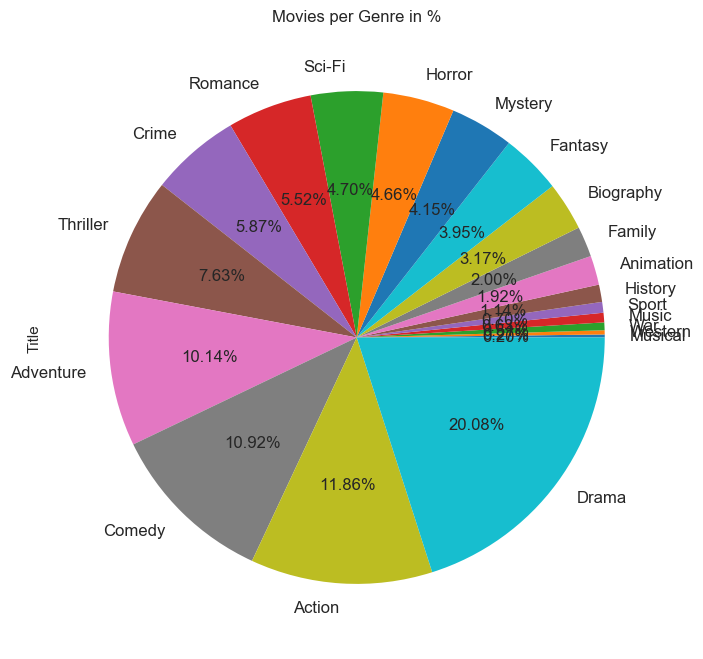

In [34]:
md_genre['Title'].plot.pie(title= 'Movies per Genre in %', figsize=(8,8), autopct='%.2f%%',fontsize=12);

From all above observations, we can conclude that most of with 513 Drama genre movies over the years are produced and it takes first place.
Action with 12%(303) movies, Comedy with 11%(279) movies are at 2nd and 3rd place respectively.

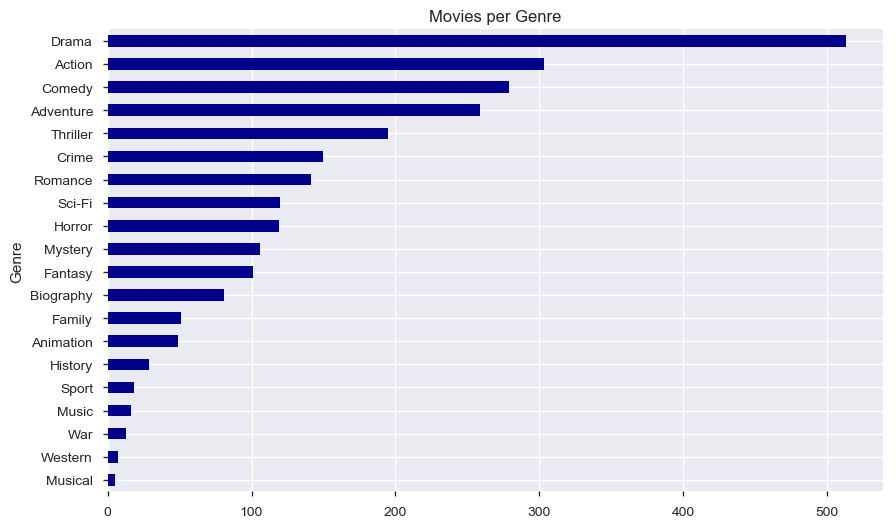

In [35]:
md_genre['Title'].plot.barh(title = 'Movies per Genre',color='DarkBlue', figsize=(10, 6));

The most common movie genres are Drama (513 movies, 20.1%) , Action (303 movies, 11.9%) and Comedy (279 movies, 10.9%).

<b>Q2. Which genres have high avg. revenue?</br >

In [36]:
# check results as below
md_genre_mean.head()

Rank         Year     Runtime    Rating          Votes  \
Genre                                                                     
Action     441.277228  2012.574257  116.739274  6.614521  235761.610561   
Adventure  426.308880  2012.517375  117.698842  6.772201  257988.818533   
Animation  487.040816  2012.734694   98.142857  7.324490  208159.428571   
Biography  518.580247  2013.345679  122.580247  7.290123  151961.148148   
Comedy     526.691756  2012.928315  105.899642  6.647670  141663.172043   

           Metascore  revenue_million  
Genre                                  
Action     54.092409         0.000120  
Adventure  57.741313         0.000151  
Animation  70.091837         0.000185  
Biography  67.777778         0.000055  
Comedy     57.679211         0.000073

In [37]:
# Sort data in ascending order 
md_genre_mean.sort_values('revenue_million', ascending=True, inplace = True )

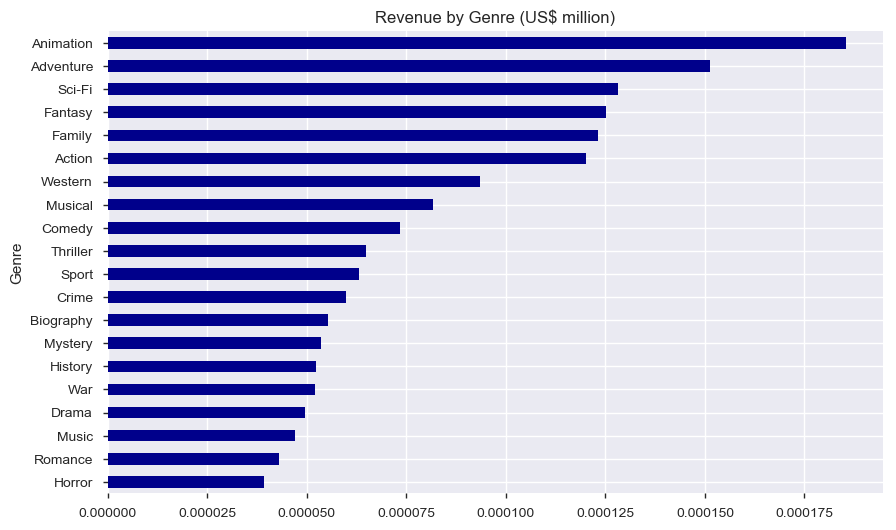

In [38]:
## Create bar chart with revenue and budget
md_genre_mean['revenue_million'].plot.barh(stacked=False, title = 'Revenue by Genre (US$ million)',color=('DarkBlue'), figsize=(10,6));

Animation and Adventure movies are earning a lot revenue over the years. Hence Computer Graphics and Adventure related movies are liked by people more.

<b> Q3. Which genres have high vote avg.? </b>

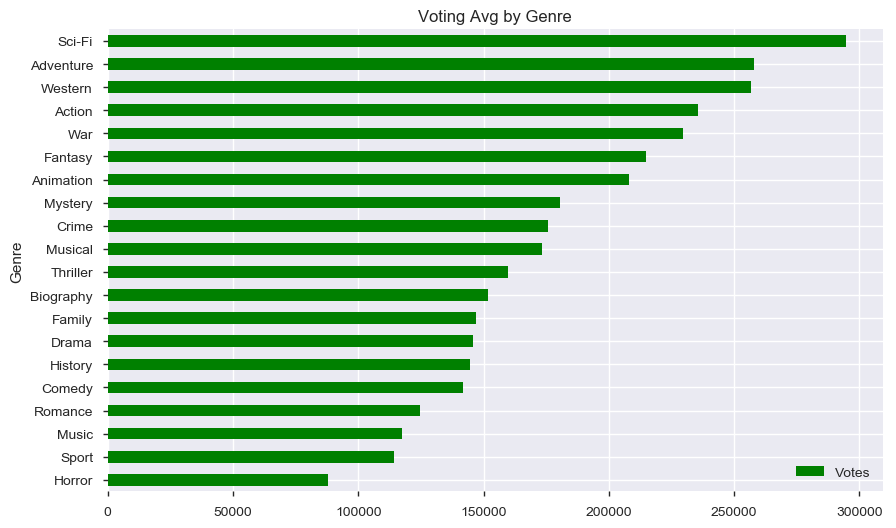

In [39]:
md_genre_mean.sort_values('Votes', ascending=True, inplace = True)
md_genre_mean[['Votes']].plot.barh(stacked=True, title = 'Voting Avg by Genre',color='Green', figsize=(10, 6));

Out of all Genres, Sci-fi, Adventure, Western, Action, and War Genre movies are most voted by people. People like to talk more about such genre of movies.

<b> Q4. Which genres have high avg. ratings and Metacritics?</b>

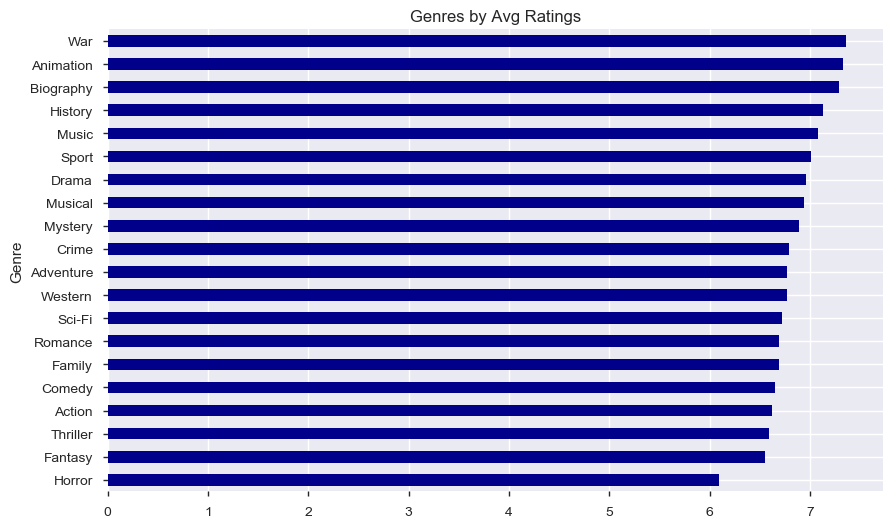

In [40]:
md_genre_mean.sort_values('Rating', ascending=True, inplace = True)
md_genre_mean['Rating'].plot.barh(stacked=True, title = 'Genres by Avg Ratings',color='DarkBlue', figsize=(10, 6));

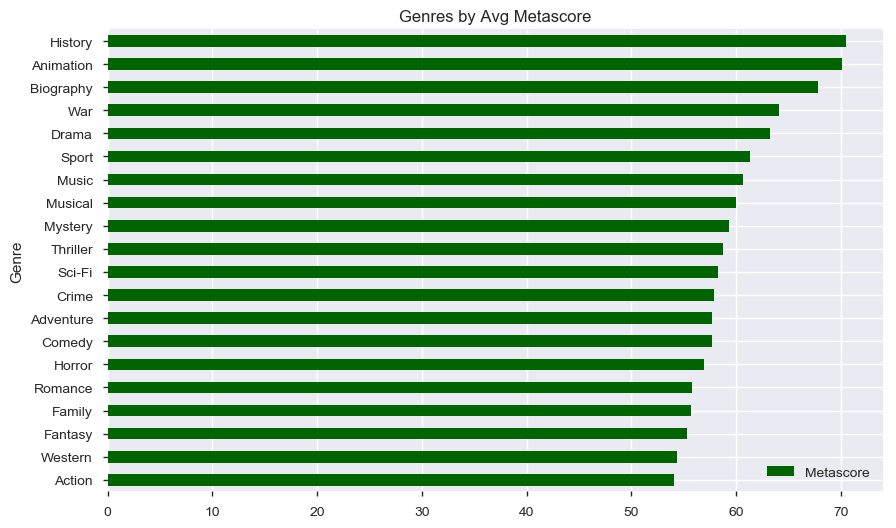

In [41]:
md_genre_mean.sort_values('Metascore', ascending=True, inplace = True)
md_genre_mean[['Metascore']].plot.barh(stacked=True, title = 'Genres by Avg Metascore',color='DarkGreen', figsize=(10, 6));

<b> Plotting Movies trends in years across Ratings and Runtime</b>

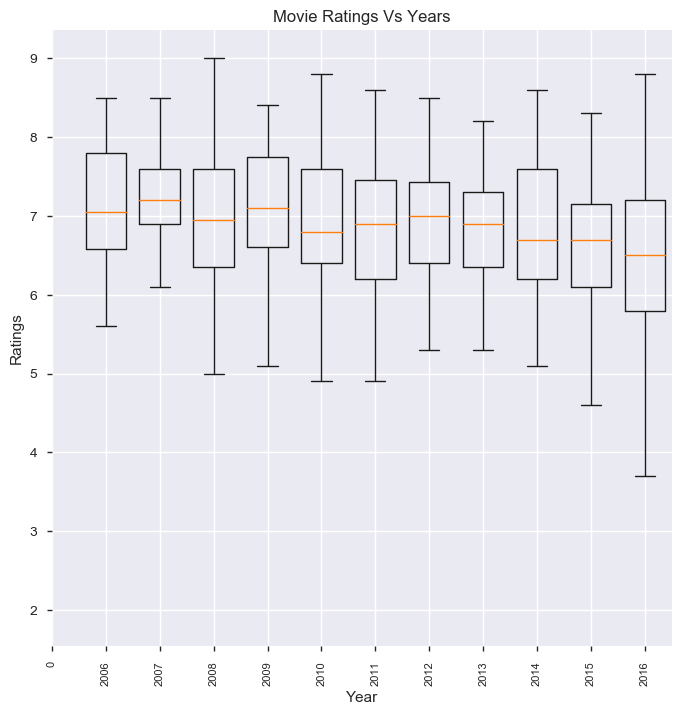

In [42]:
year=(md.Year.unique()).astype(int)
year=sorted(year)

yearRatings=[]
numOfMovieByYear=[]
for i in year:
    tmp=md.Rating[md.Year==i]
    yearRatings.append(tmp)
    numOfMovieByYear.append(len(tmp))

plt.figure(figsize=(8,8))
plt.title("Movie Ratings Vs Years")
plt.ylabel("Ratings")
plt.xlabel('Year')
plt.boxplot(yearRatings,widths=.75)
year=list(np.insert(year,0,0))
plt.xticks(range(len(year)),year,rotation=90,fontsize=8)
plt.show()

del(year[0])

Movie Ratings vs Years in different chart visualization

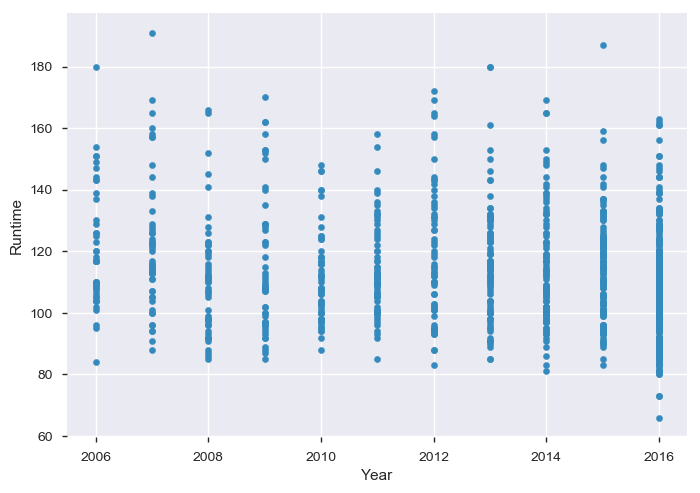

In [43]:
md.plot(x='Year', y='Runtime', kind='scatter');

In 2016 there was one movie which is very less comparted to any other years. Peak of one of the movies is around 195 minutes(3.15 hrs)

<b>Q5. Analysis of development of means of variables per genre over the years</b>

In [44]:
# Reminder of how the data frame looked like, when we splitted for genres
md_split_genres.head(5)

Rank                    Title  \
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
1     2               Prometheus   
1     2               Prometheus   

                                         Description      Director  \
0  A group of intergalactic criminals are forced ...    James Gunn   
0  A group of intergalactic criminals are forced ...    James Gunn   
0  A group of intergalactic criminals are forced ...    James Gunn   
1  Following clues to the origin of mankind, a te...  Ridley Scott   
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              Actors  Year  Runtime  Rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   

    Votes  Revenue  Metascore      Genre  
0  757074   333.13       76.0     Action  
0  757074   333.13       76.0  Adventure  
0  757074   333.13       76.0     Sci-Fi  
1  485820   126.46       65.0  Adventure  
1  485820   126.46       65.0    Mystery

In [45]:
# Create data frame grouped by genres AND release year, get means of required variables.
md_year_genre_mean = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Revenue', 'Rating','Metascore','Votes','Runtime'].mean())
md_year_genre_mean.head()

Revenue    Rating  Metascore          Votes     Runtime
Year Genre                                                                
2006 Action     155.635909  6.881818  61.590909  323606.636364  125.272727
     Adventure  123.024615  7.069231  66.038462  271047.615385  125.307692
     Animation  221.020000  6.800000  75.000000  212293.000000  112.500000
     Biography   61.343333  7.233333  68.666667  177644.333333  120.000000
     Comedy      76.336667  6.825000  64.916667  157379.333333  107.250000

Revenue per genre per year as in above chart.

In [46]:
md_year_genre_revenue = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Revenue'].mean())
md_year_genre_revenue.head()

Revenue
Year Genre                
2006 Action     155.635909
     Adventure  123.024615
     Animation  221.020000
     Biography   61.343333
     Comedy      76.336667

In [47]:
# pivot data to get the shape that is necessary for a heatmap that displays genres, years and avg. revenue per genre per year
md_heat_revenue_pivot = pd.pivot_table(md_year_genre_revenue, values='Revenue', index=['Genre'], columns=['Year'])
md_heat_revenue_pivot.head()

Year             2006        2007        2008        2009        2010  \
Genre                                                                   
Action     155.635909  142.477083  131.270000  192.460000  110.374600   
Adventure  123.024615  153.278182  159.570909  179.450556  167.981957   
Animation  221.020000  138.770000  219.605000  123.407500  246.604000   
Biography   61.343333   47.240000   15.692500  129.940000   86.905000   
Comedy      76.336667  102.301000   77.442500   97.090357  105.794444   

Year             2011        2012        2013        2014        2015  \
Genre                                                                   
Action     122.569000  140.509524  119.582069  138.251892  139.182571   
Adventure  157.611667  172.577778  184.101818  156.286833  164.933636   
Animation  167.535000  213.345000  345.760000  176.850000  259.877500   
Biography   44.395000  159.110000   80.282500  113.780000   36.135833   
Comedy      68.814211   88.211905   93.633043   56.853833   67.842568   

Year             2016  
Genre                  
Action      73.846533  
Adventure  111.759435  
Animation  139.628333  
Biography   31.409194  
Comedy      57.914398

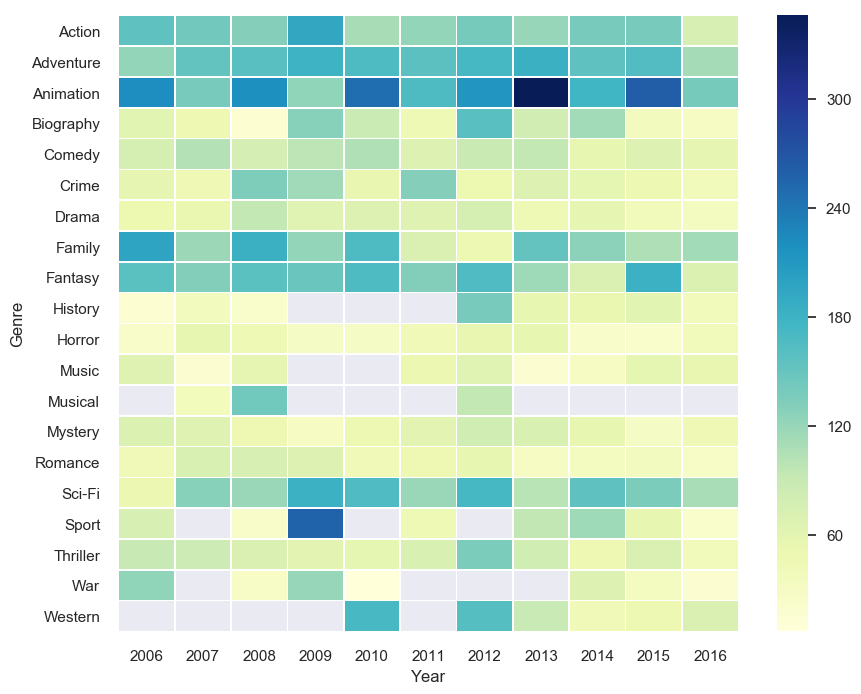

In [48]:
# display heatmap
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(md_heat_revenue_pivot, linewidths=.5, cmap='YlGnBu');

This heatmap displays the average Revenue per genre per year from 2006 to 2016. The darker blue fields show higher Revenue, the brighter green into yellow fields show lower Revenue. In general, revenues are increasing over time for especially for the genres Action, Adventure, Animation, Family, Fantasy and Science Fiction. Animation movies had a very profitable year in 2013, 2015 and Sports in 2009.

Vote Average per genre per year

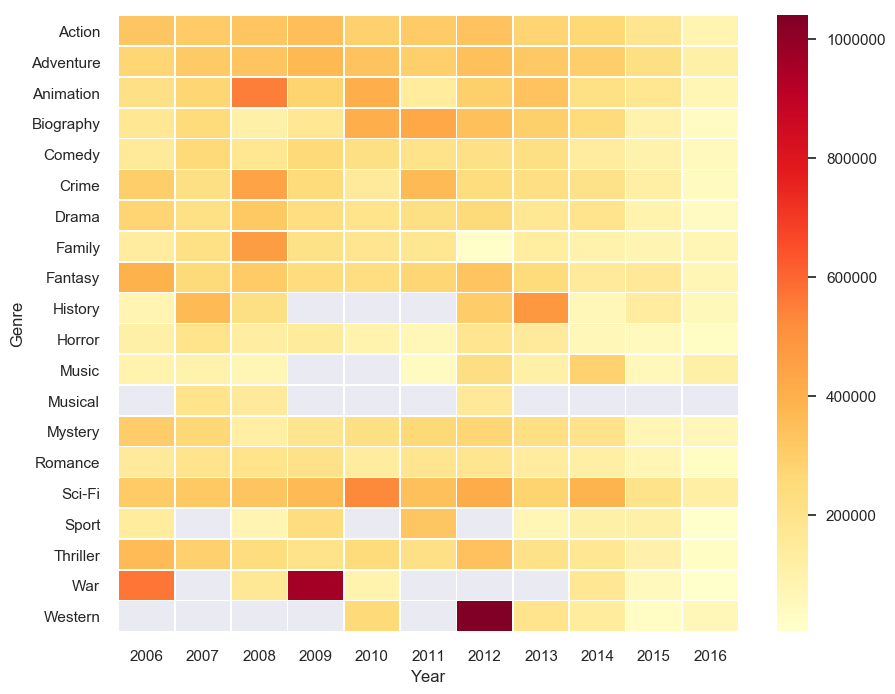

In [49]:
md_year_genre_vote_avg = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Votes'].mean())
md_heat_vote_avg_pivot = pd.pivot_table(md_year_genre_vote_avg, values='Votes', index=['Genre'], columns=['Year'])
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(md_heat_vote_avg_pivot, linewidths=.5, cmap='YlOrRd');

This heatmap displays the average Votes per genre per year from 2006 to 2016. The darker Red fields show higher Votes. In general, Votes are decresing over time for overall all the genres. In 2009 War Genre has maximum votes, and in 2012 the Westen movies had maximum votes.

Metascore Average per genre per year

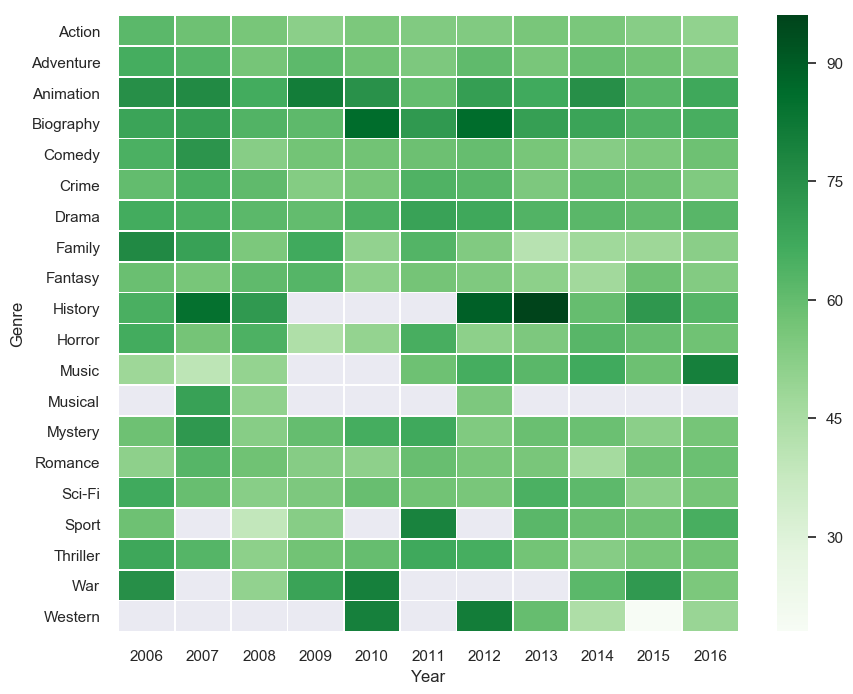

In [50]:
md_year_genre_rating = pd.DataFrame(md_split_genres.groupby(['Year','Genre'])['Metascore'].mean())
md_heat_rating_pivot = pd.pivot_table(md_year_genre_rating, values='Metascore', index=['Genre'], columns=['Year'])
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(md_heat_rating_pivot, linewidths=.5, cmap='Greens');

History genre movies persistently has high metascores in 2007, 2012, and most in 2013

In [51]:
# Now continuing with Director and Actors field exploration
# Creating dataframe for Director
md_Director = pd.DataFrame(md_split_genres.groupby('Director').Title.nunique())
md_Director.head(5)

Title
Director                  
Aamir Khan               1
Abdellatif Kechiche      1
Adam Leon                1
Adam McKay               4
Adam Shankman            2

In [52]:
md.Director.nunique()

644

In [53]:
md_year_Director_revenue = pd.DataFrame(md_split_genres.groupby(['Director','Year'])['Revenue'].mean())
md_year_Director_revenue.head()

Revenue
Director            Year         
Aamir Khan          2007    1.200
Abdellatif Kechiche 2013    2.200
Adam Leon           2016   47.985
Adam McKay          2006  148.210
                    2008  100.470

In [54]:
#Calculating largest Directors whose revenue was more against years
md_year_Director_revenue.nlargest(10,'Revenue')

Revenue
Director          Year         
J.J. Abrams       2015   936.63
James Cameron     2009   760.51
Colin Trevorrow   2015   652.18
Joss Whedon       2012   623.28
Christopher Nolan 2008   533.32
Gareth Edwards    2016   532.17
Andrew Stanton    2016   486.29
Joss Whedon       2015   458.99
Christopher Nolan 2012   448.13
Francis Lawrence  2013   424.65

In [55]:
#Splitting Actors and creating another dataframe as there are multiple entries for each movie
md_split_actors = md.copy()
split_actors = md_split_actors['Actors'].str.split(',').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_actors.name = 'actors_split'
md_split_actors = md_split_actors.drop(['Actors'], axis=1).join(split_actors)
md_split_actors.head(5)

Rank                    Title  \
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
0     1  Guardians of the Galaxy   
1     2               Prometheus   

                                         Description      Director  Year  \
0  A group of intergalactic criminals are forced ...    James Gunn  2014   
0  A group of intergalactic criminals are forced ...    James Gunn  2014   
0  A group of intergalactic criminals are forced ...    James Gunn  2014   
0  A group of intergalactic criminals are forced ...    James Gunn  2014   
1  Following clues to the origin of mankind, a te...  Ridley Scott  2012   

   Runtime  Rating   Votes  Revenue  Metascore     actors_split  
0      121     8.1  757074   333.13       76.0      Chris Pratt  
0      121     8.1  757074   333.13       76.0       Vin Diesel  
0      121     8.1  757074   333.13       76.0   Bradley Cooper  
0      121     8.1  757074   333.13       76.0      Zoe Saldana  
1      124     7.0  485820   126.46       65.0     Noomi Rapace

In [56]:
md_split_actors['actors_split'].value_counts().head(5)

Mark Wahlberg          11
Christian Bale         11
Denzel Washington       9
Brad Pitt               9
Matthew McConaughey     9
Name: actors_split, dtype: int64

In [57]:
# Create data frame grouped by Actors AND release year, get means of required variables
md_year_actors_mean = pd.DataFrame(md_split_actors.groupby(['Year','actors_split'])['Revenue', 'Rating','Metascore','Votes','Runtime'].mean())
md_year_actors_mean.head()

Revenue  Rating  Metascore     Votes  Runtime
Year actors_split                                                   
2006  Abbie Cornish       7.46     6.9       47.0   74674.0    117.0
      Abigail Breslin    59.89     7.8       80.0  374044.0    101.0
      Adrian Grenier    124.73     6.8       62.0  302268.0    109.0
      Alan Rickman        2.21     7.5       56.0  199387.0    147.0
      Albert Finney       7.46     6.9       47.0   74674.0    117.0

In [58]:
md_year_Actors_revenue = pd.DataFrame(md_split_actors.groupby(['actors_split','Year'])['Revenue'].mean())
md_year_Actors_revenue.head()

Revenue
actors_split   Year         
 50 Cent       2013   25.120
 A.C. Peterson 2016   47.985
 AJ Michalka   2011  126.980
 Aamir Khan    2007    1.200
 Aaron Burns   2013    7.190

In [59]:
#Calculating Actors against Revenue earned for Movies over the years
md_year_Actors_revenue.nlargest(20,'Revenue')

Revenue
actors_split         Year         
 John Boyega         2015   936.63
 Oscar Isaac         2015   936.63
Daisy Ridley         2015   936.63
 Sigourney Weaver    2009   760.51
 Zoe Saldana         2009   760.51
Sam Worthington      2009   760.51
 Bryce Dallas Howard 2015   652.18
 Ty Simpkins         2015   652.18
Chris Pratt          2015   652.18
Judy Greer           2015   652.18
 Chris Evans         2012   623.28
 Scarlett Johansson  2012   623.28
Robert Downey Jr.    2012   623.28
 Aaron Eckhart       2008   533.32
 Heath Ledger        2008   533.32
Christian Bale       2008   533.32
Michael Caine        2008   533.32
 Alan Tudyk          2016   532.17
 Donnie Yen          2016   532.17
Felicity Jones       2016   532.17

<b> Plotting Wordcloud for most occurred Director and Actor across the 1000 movies</b>

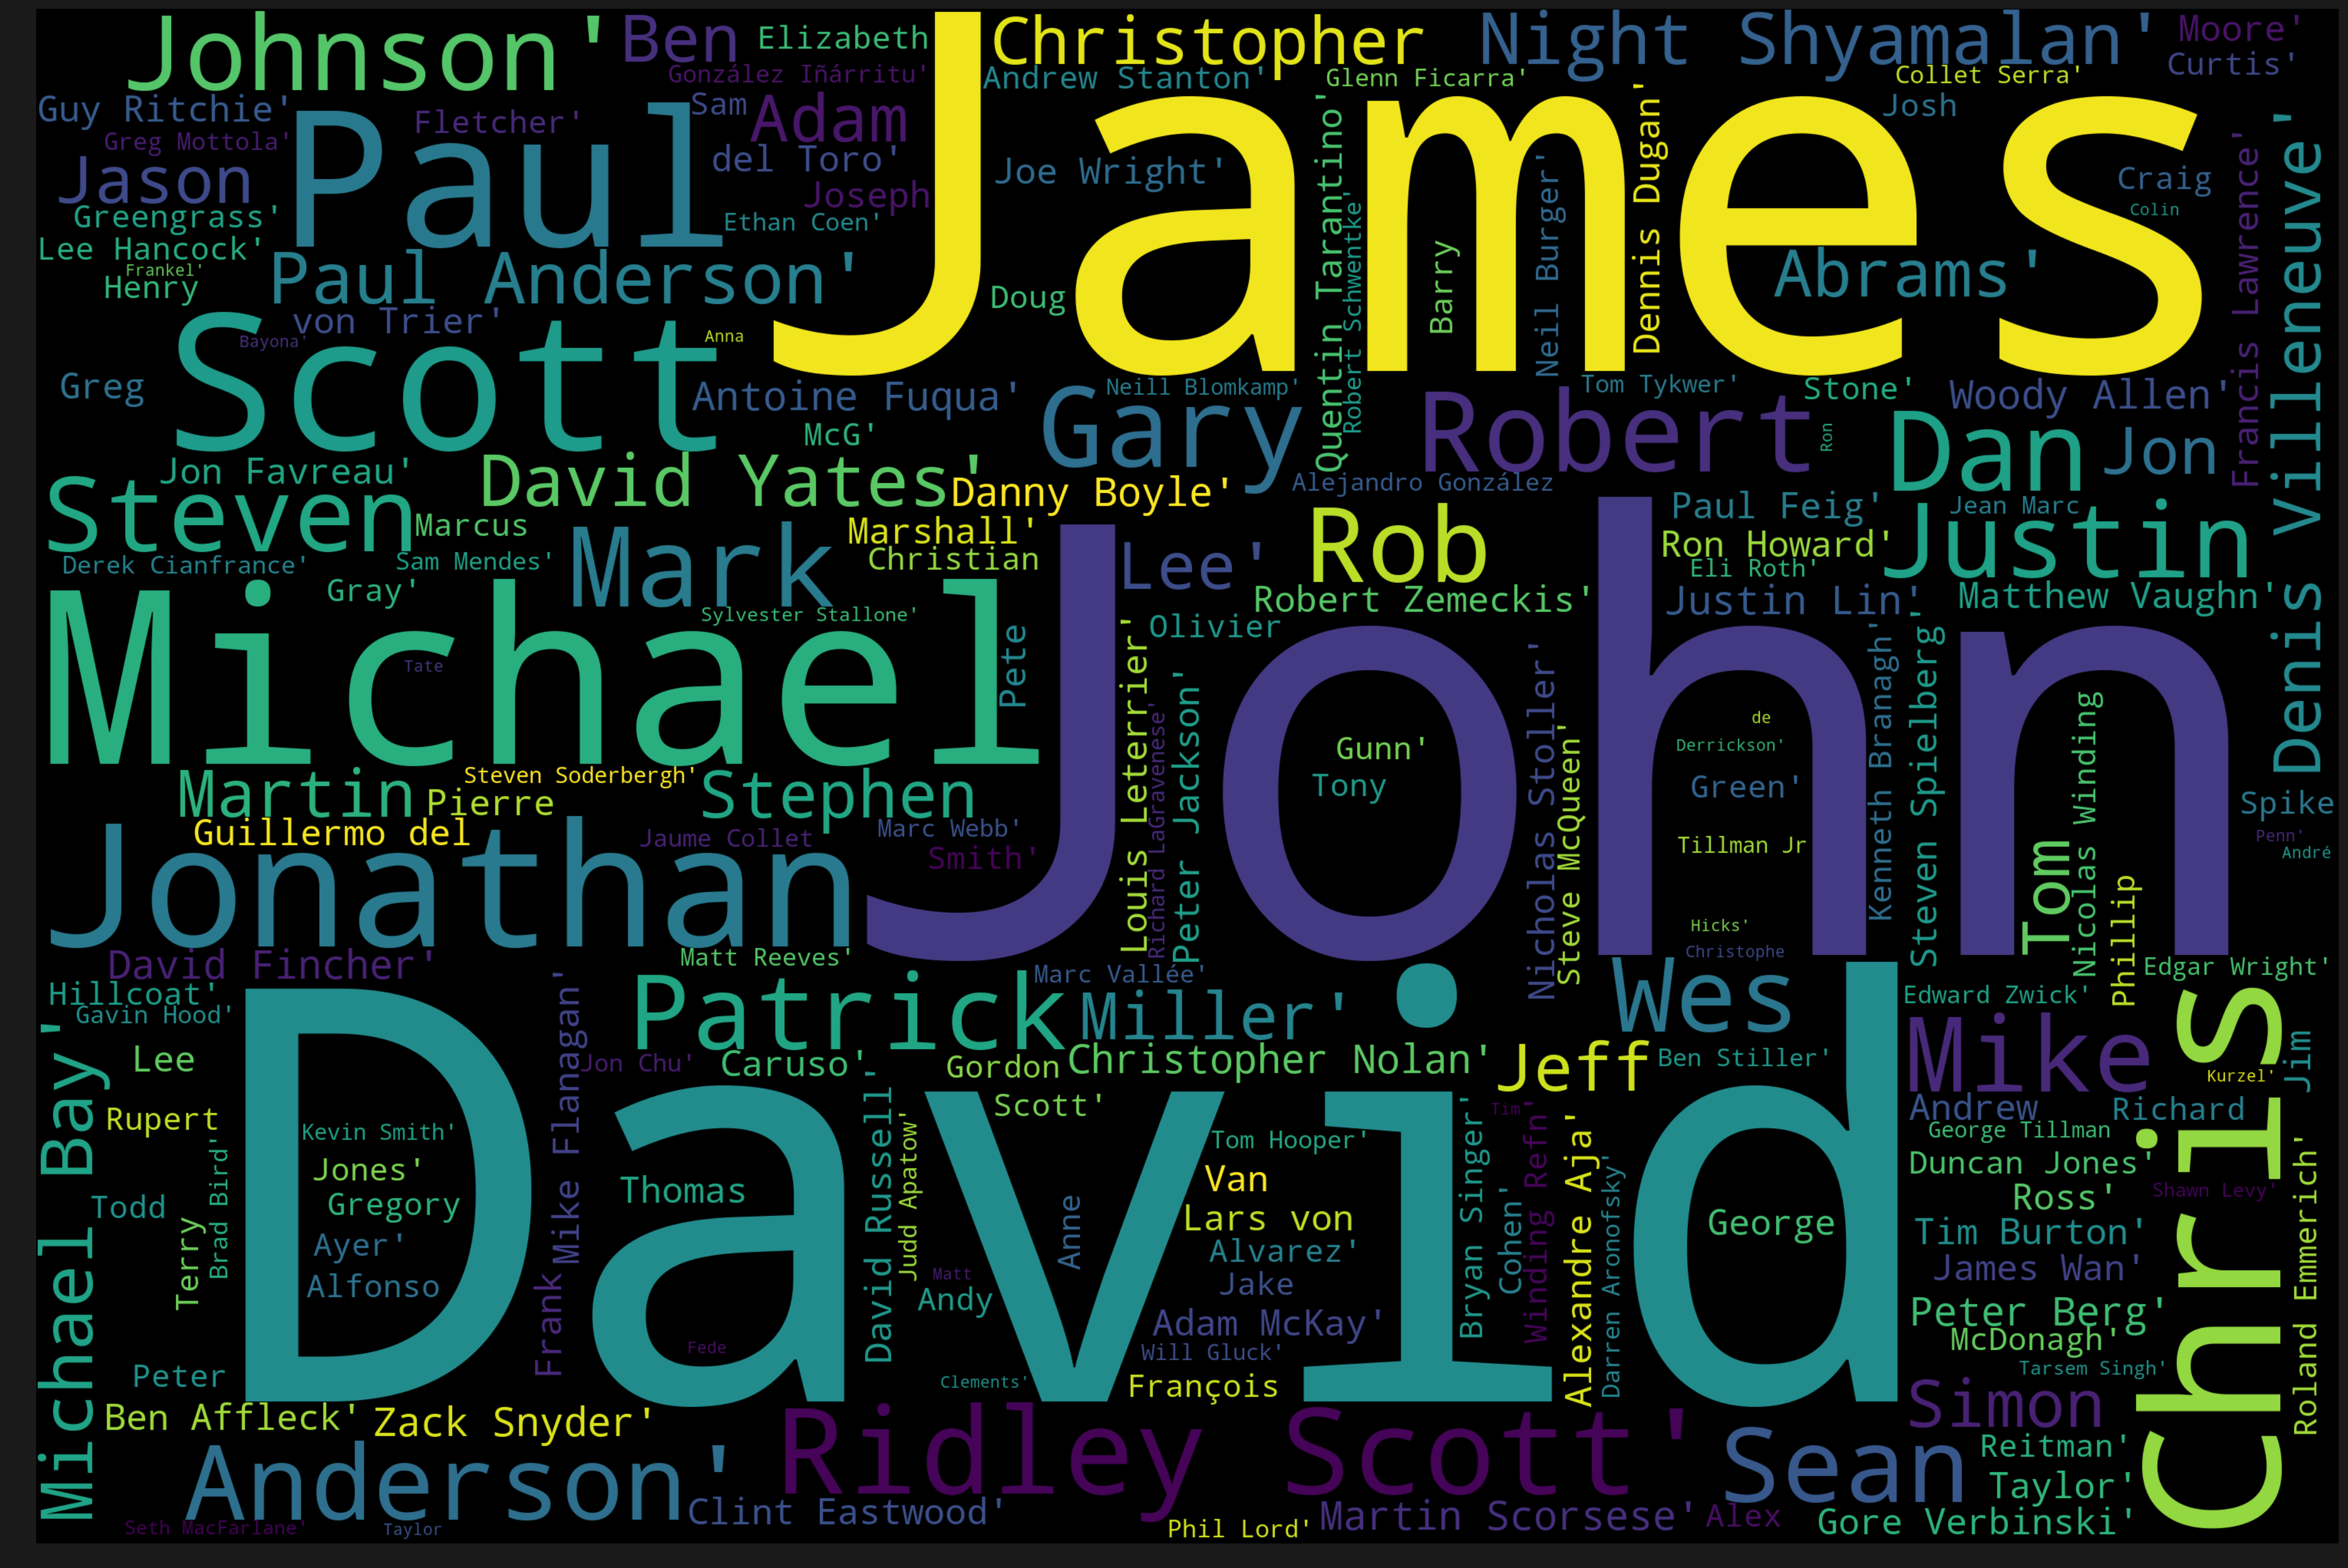

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = md.Director.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

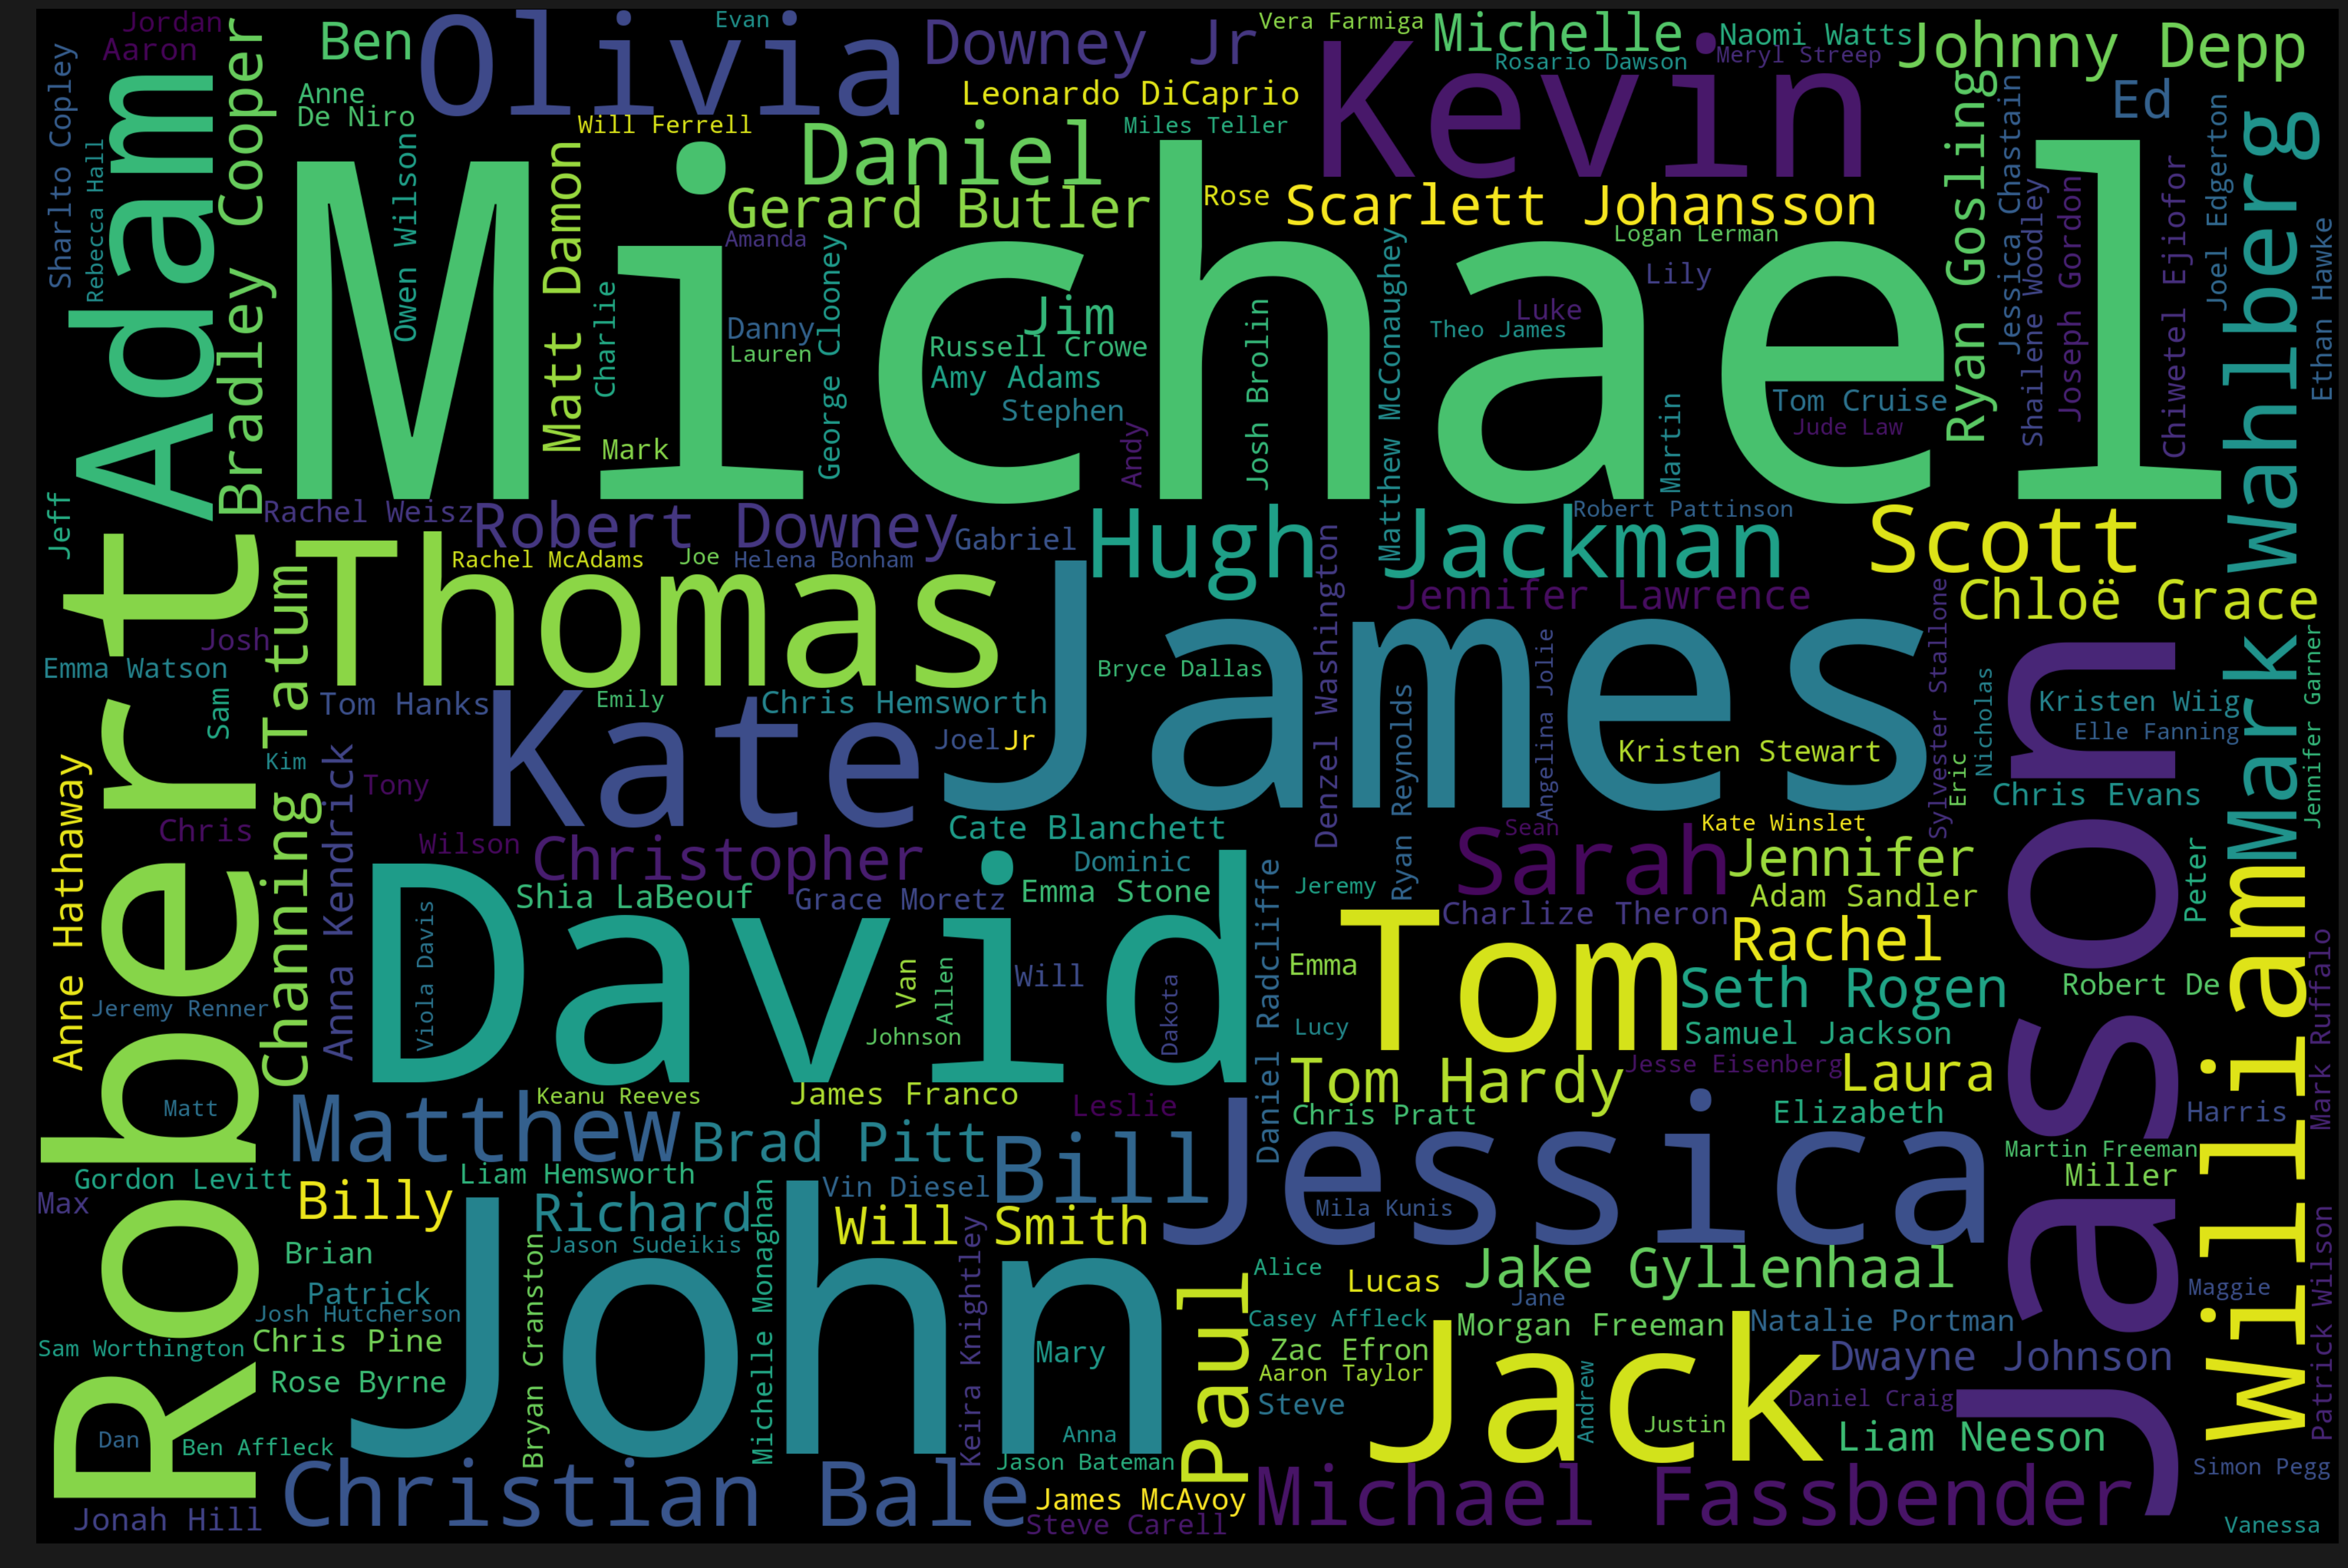

In [61]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = md.Actors.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most Famous names of the actors are Micheal, David, John, Jessica and many more as per chart above

# Research Hypothesis

<b>H1. The best movies according to vote avg. return high revenue.</b>

In [62]:
md.corr(method='pearson')

Rank      Year   Runtime    Rating     Votes   Revenue  \
Rank       1.000000 -0.261605 -0.221739 -0.219555 -0.283876 -0.259607   
Year      -0.261605  1.000000 -0.164900 -0.211219 -0.411904 -0.146589   
Runtime   -0.221739 -0.164900  1.000000  0.392214  0.407062  0.272955   
Rating    -0.219555 -0.211219  0.392214  1.000000  0.511537  0.218448   
Votes     -0.283876 -0.411904  0.407062  0.511537  1.000000  0.638758   
Revenue   -0.259607 -0.146589  0.272955  0.218448  0.638758  1.000000   
Metascore -0.184922 -0.075970  0.202079  0.604522  0.317268  0.141381   

           Metascore  
Rank       -0.184922  
Year       -0.075970  
Runtime     0.202079  
Rating      0.604522  
Votes       0.317268  
Revenue     0.141381  
Metascore   1.000000

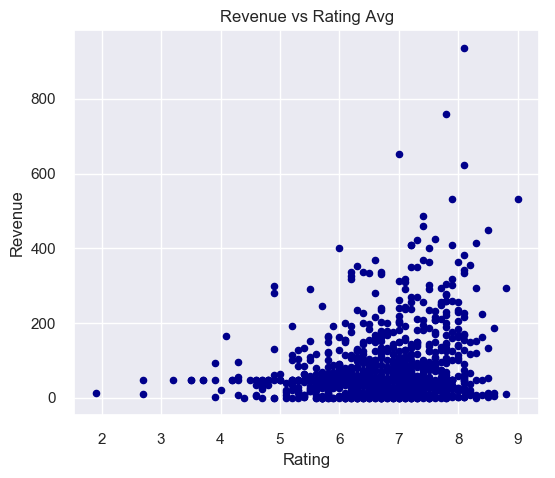

In [63]:
md.plot.scatter(x='Rating', y='Revenue',title='Revenue vs Rating Avg',color='DarkBlue',figsize=(6,5));

As per above chart, more ratings are clustered around 5-8 and revenue correlatively varied from 250-650 millions. More ratings lead to more Revenue trend can be seen in mentioned period

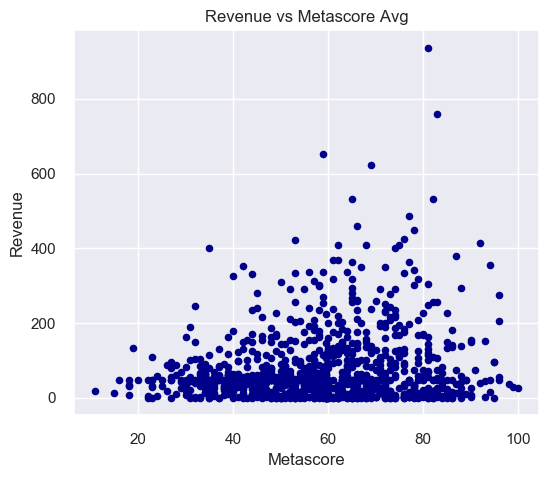

In [64]:
md.plot.scatter(x='Metascore', y='Revenue',title='Revenue vs Metascore Avg',color='DarkBlue',figsize=(6,5));

Metascore between 60-80 has maximum revenue scale apart from few outliers.

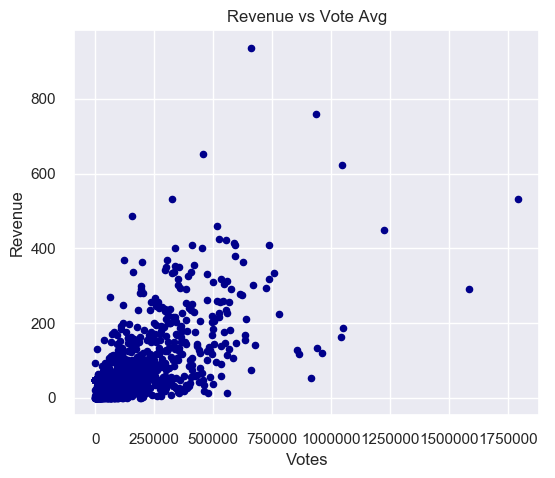

In [65]:
md.plot.scatter(x='Votes', y='Revenue',title='Revenue vs Vote Avg',color='DarkBlue',figsize=(6,5));

As Votes will increase, there is might chance of increasing Revenue which is current trend says so.

<a id=section4></a>

# Conclusion

1. Over the years lot of movies were made and increasingly Genres are also increased. Peak was between 2014 and 2016. 2. Over the years, lot of Drama movies were released with total of more than 500 which is half of total comparison in sheet values.
3. Though people vote more for Selective genres such as Sci-fi, Action, Adventure movies, but comparatively Animation Genre movies are earning more revenue.
4. Over the years it is observed that Ratings and Metascore trend is decreasing. Hence people are giving rating less or voting less for getting proper result ?
5. It is relative to say that if ratings and metascore are more then movie revenue is increasing.
